### QPSK Modulation
#### Theory
In digital communication systems, modulation is a fundamental process used to encode digital information onto a carrier signal for transmission. One common modulation technique is Quadrature Amplitude Modulation (QAM), which combines two carrier signals that are orthogonal to each other. These carriers are typically sine and cosine waves. The digital data is split into two streams: odd bits and even bits. Each stream modulates one of the carriers, resulting in two modulated signals. These signals are then combined to form the final modulated signal.
The process involves the following steps:
1. Unipolar Non-Return-to-Zero (NRZ) Encoding
2. Carrier Signal Generation
3. **Modulation**: The odd bits modulate the cosine carrier, and the even bits modulate the sine carrier.
4. **Signal Combination**: The two modulated signals are added together to form the final QAM signal.
#### Objectives
- Understand the concept of digital modulation and its role in communication systems.
- Implement Unipolar NRZ encoding and generate orthogonal carrier signals.
- Perform modulation of binary data streams and visualize the results.


In [164]:
import numpy as np
import matplotlib.pyplot as plt

In [165]:
def unipolar_nrz(data, sampling_rate=1000):
	time = np.arange(0, len(data), 1/sampling_rate)
	signal = np.zeros_like(time)
	for i, bit in enumerate(data): signal[i*sampling_rate:(i+1)*sampling_rate] = 1 if bit == 1 else 0
	return time, signal

In [166]:
bits = np.random.randint(0, 2, 8)
total_time, dsignal = unipolar_nrz(bits, 100)
odd_bits = bits[0::2]
even_bits = bits[1::2]
time, odd_dsignal = unipolar_nrz(odd_bits, 100)
_, even_dsignal = unipolar_nrz(even_bits, 100)
carrier1 = np.cos(2 * np.pi * 10 * time)
carrier2 = np.sin(2 * np.pi * 10 * time)
modulated_signal1 = (2*odd_dsignal-1) * carrier1
modulated_signal2 = (2*even_dsignal-1) * carrier2
modulated_signal = modulated_signal1 + modulated_signal2

bits		 [0 0 1 1 0 1 1 0] 
Odd bits	 [0 1 0 1] 
Even bits	 [0 1 1 0]


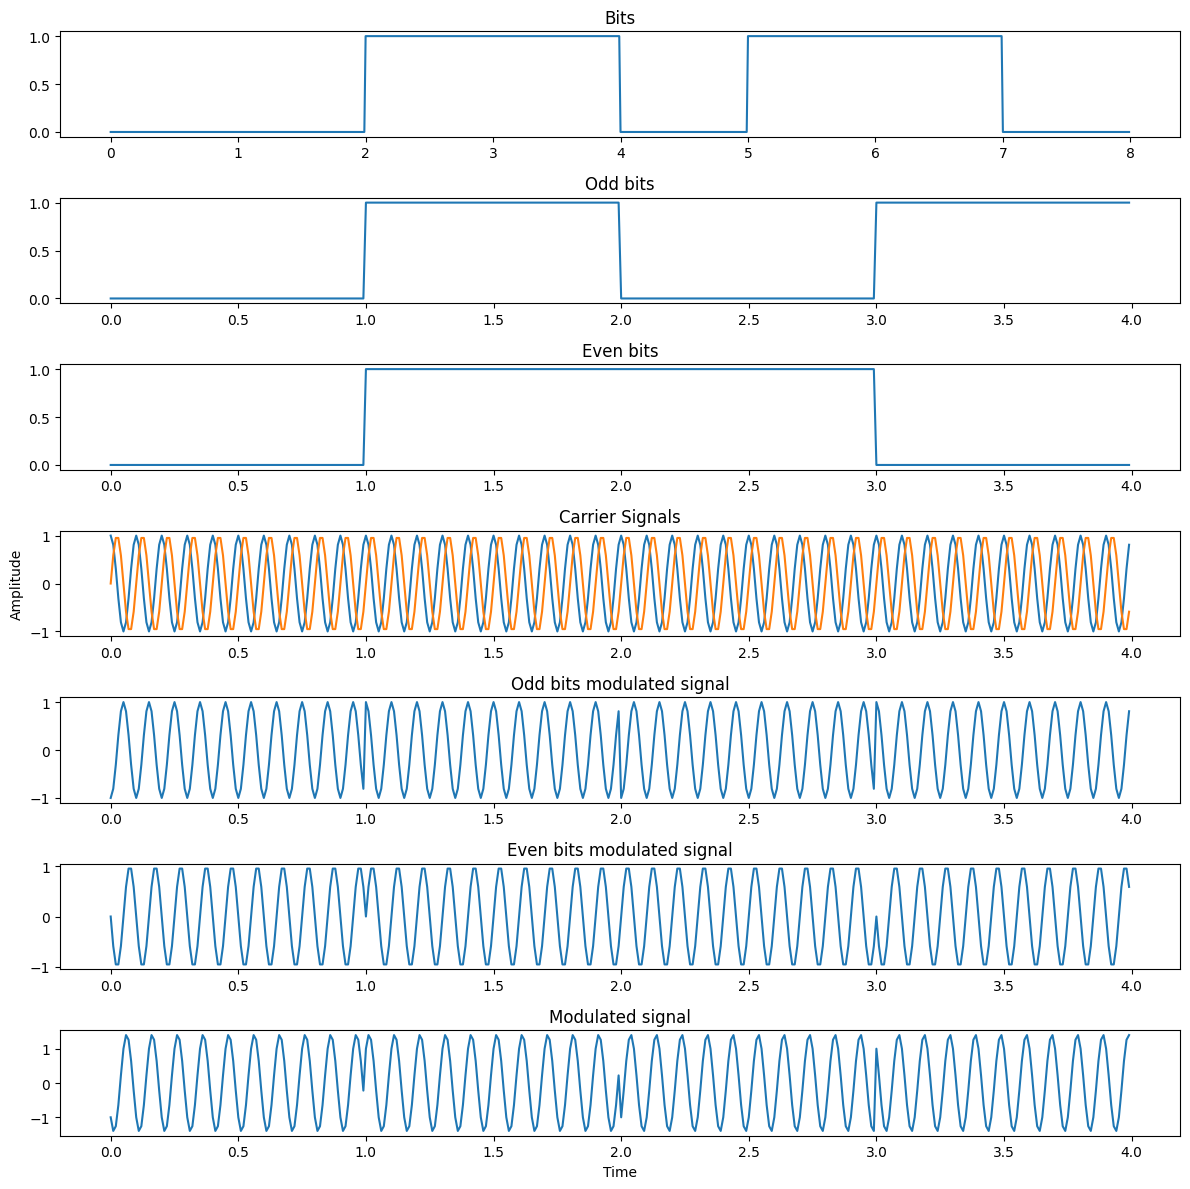

In [167]:
plt.figure(figsize=(12, 12))
plt.subplot(7, 1, 1)
plt.plot(total_time, dsignal)
plt.title("Bits")

plt.subplot(7, 1, 2)
plt.plot(time, odd_dsignal)
plt.title("Odd bits")

plt.subplot(7, 1, 3)
plt.plot(time, even_dsignal)
plt.title("Even bits")

plt.subplot(7, 1, 4)
plt.plot(time, carrier1)
plt.plot(time, carrier2)
plt.ylabel("Amplitude")
plt.title("Carrier Signals")

plt.subplot(7, 1, 5)
plt.plot(time, modulated_signal1)
plt.title("Odd bits modulated signal")

plt.subplot(7, 1, 6)
plt.plot(time, modulated_signal2)
plt.title("Even bits modulated signal")

plt.subplot(7, 1, 7)
plt.plot(time, modulated_signal)
plt.xlabel("Time")
plt.title("Modulated signal")
plt.tight_layout()
print("bits\t\t", bits, "\nOdd bits\t", odd_bits, "\nEven bits\t", even_bits)